<a href="https://colab.research.google.com/github/journalWheat/CSI4106Project1-JaredWagner/blob/main/CSI4106Project1_JaredWagner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AUTHOR INFO
Intellectual property of JARED WAGNER, October 2022.

Project 1: CSI4106 (Introduction ot Artificial Intelligence)

#What's in an airline?

The dataset I have chosen for this project contains customer satisfaction for travellers aboard an unnamed airline (which I shall refer to as "Fastway Air" for the purposes of this report.) Each sample contains data about the trip itself (e.g. how long the flight was delayed), some light demographic information (age and sex), and some evidently self-reported data from the customer rating different aspects of their trip.

My main focus parsing this data will be to create models which can accurately determine whether a customer was 'satisfied' or 'unsatisfied or neutral' with their trip, using the predictors I have available to me. Because there are only two categories under consideration, this is a binary classification problem.

Customer satisfaction is a valuable business metric. For Fastway Air, the ability to categorize a customer are 'satisfied' or not could impact how they change their internal business practices (to maximize satisfaction), or how they make it up to customers who they can predict were unhappy with their 8-hour trip to Europe with poor wifi service. In my own experience with SkipTheDishes -- a food delivery service -- my wrath has been suspended time after time when they succesfully predict my dissatisfaction with a 1-hour-over-estimated lag-time and send me an email to say "sorry for the wait! Here's $5 off."

# Analyzing the data + feature engineering

The main problem to start with is to glean some initial insights on the data provided. From Kaggle, it is already clear that this dataset is fairly large (~12000 samples) with lots of columns which may or may not be relevant. To start with, what are the metrics we have available to us?

In [19]:
import pandas as pd
airline_raw_df = pd.read_csv('https://raw.githubusercontent.com/journalWheat/CSI4106Project1-JaredWagner/main/airline_passenger_satisfaction.csv')

for column in airline_raw_df:
  print(column)

Unnamed: 0
Gender
customer_type
age
type_of_travel
customer_class
flight_distance
inflight_wifi_service
departure_arrival_time_convenient
ease_of_online_booking
gate_location
food_and_drink
online_boarding
seat_comfort
inflight_entertainment
onboard_service
leg_room_service
baggage_handling
checkin_service
inflight_service
cleanliness
departure_delay_in_minutes
arrival_delay_in_minutes
satisfaction


Clearly: I have options for what metrics I use. Ideally I would like to use the self-reported metrics, which have values 0-5, because processing these metrics measured on the same scale will be easier than dealing with categorical (e.g. Gender='Male'/'Female') data or data on a wider range (e.g. 'departure_delay_in_minutes'). 

Therefore, my initial analysis will be to determine if I can get by just with the self-reported data from customers. I'll pull these columns into a new dataframe and visualize the distribution of this data.

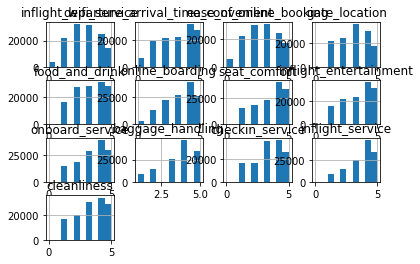

Number of samples: 129880

 Counting null values by category:
inflight_wifi_service                0
departure_arrival_time_convenient    0
ease_of_online_booking               0
gate_location                        0
food_and_drink                       0
online_boarding                      0
seat_comfort                         0
inflight_entertainment               0
onboard_service                      0
baggage_handling                     0
checkin_service                      0
inflight_service                     0
cleanliness                          0
satisfaction                         0
dtype: int64


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
#'rf_df'='response features dataframe'
rf_df = airline_raw_df[['inflight_wifi_service','departure_arrival_time_convenient','ease_of_online_booking','gate_location','food_and_drink','online_boarding','seat_comfort','inflight_entertainment','onboard_service','baggage_handling','checkin_service','inflight_service','cleanliness', 'satisfaction']].copy()

rf_df.hist()
plt.show()

print('Number of samples: ' + str(len(rf_df)))
print('\n Counting null values by category:')
print(rf_df.isnull().sum()) # command from https://datatofish.com/check-nan-pandas-dataframe/

This leaves us with 13 predictors, and ~130,000 samples. Luckily, there are no null values. Note that I haven't exluded any samples yet, so that is the original size of the raw data from my .csv file.

From the histograms, I see that most of the categories have some responses of 0. The original poster of the dataset did not indicate what this means, but I assume that a 0 indicates that a question was non-applicable for a particular flier filling out their survey. For example, a flier on a plane with no wifi service wouldn't be able to rate the wifi service on their plane.

I am inclided to treat these responses as null responses and eliminate them because they are dwarfed by the other responses for each predictor, but that's a decision for later (when I am deciding how to encode the data.)

#Encoding

...blah blah blah

# Preparing for cross-validation
...blah blah blah

# Training Naive Bayes: Version 1
In this section, I'll train a Naive Bayes model using the details I have discussed up until the end of the section "Preparing for cross-validation."